#### Practical Lab 1 - Univariate Linear Regression on the California Housing Prices Dataset
#### Name : Nasr Aalani , Section:1 , Student number : 9039537 

#### The real estate market is one of the main areas that economists focus on to gain a deep understanding of all the aspects that affect unit prices and how they can utilize machine learning (ML) for more accurate predictions. The significance of this understanding relies on the stakeholders in the market, which include buyers, sellers, investors, and government planners.

##### ML provides the capacity to analyze multiple features that influence house prices. In this analysis, the focus will be on three main features: median income, population, and the number of households within a block. The results will demonstrate the relationship between each of these features and house prices.

In [34]:
#import Requierd Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
# import the data and transform it into a pandas dataframe

housing_data = pd.read_csv('/Users/nasr/Cons_Code/CSCN8010_Main/CSCN8010-labs/lab_1/housing.csv')

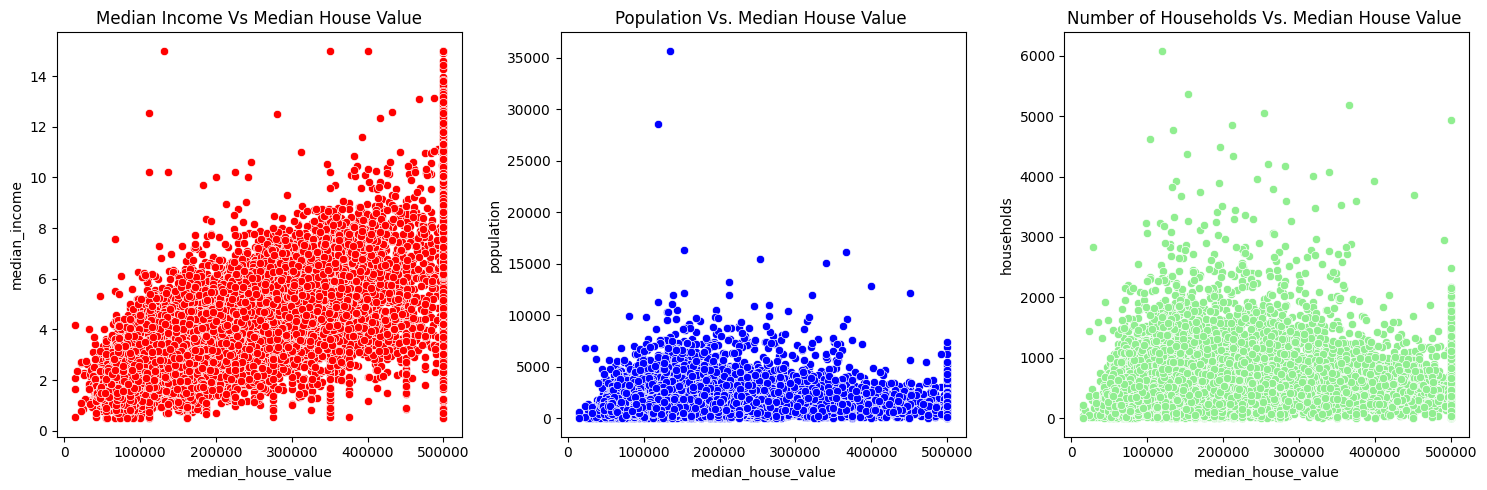

In [36]:

# Set plot size
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)#
sns.scatterplot(x='median_house_value', y='median_income', data=housing_data,color='red')
plt.title('Median Income Vs Median House Value')

# Plot 2: Median House Value vs. Population
plt.subplot(1, 3, 2)
sns.scatterplot(x='median_house_value', y='population', data=housing_data,color='blue')
plt.title('Population Vs. Median House Value ')

# Plot 3: Median House Value vs. Number of Households
plt.subplot(1, 3, 3)
sns.scatterplot(x='median_house_value', y='households', data=housing_data,color='lightgreen')
plt.title('Number of Households Vs. Median House Value ' )

# Show the plots
plt.tight_layout()
plt.show()

The Median Income vs. Median House Value chart shows an inconsistency in the data where the maximum house price is capped at $500,000. The reason behind this is that all houses that exceed $500,000 have been registered as $500,000. Therefore, this value will be eliminated from the data.


In [37]:
housing_data = housing_data[housing_data.median_house_value != 500001]

In [38]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [39]:
#Exploratory Data Analysis (EDA) (2 points):
#Explore statistics (e.g. using Pandas `describe` function) 

housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19675.000000,19675.000000,19675.000000,19675.000000,19475.000000,19675.000000,19675.000000,19675.000000,19675.000000
mean,-119.563192,35.651780,28.386277,2619.763659,539.645751,1440.812198,501.186023,3.676717,192477.921017
std,2.006108,2.149802,12.509113,2181.348207,422.413200,1143.648725,383.264636,1.570272,97711.509613
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,796.000000,282.000000,2.526800,116600.000000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1179.000000,411.000000,3.450000,173800.000000
75%,-117.990000,37.730000,37.000000,3120.000000,648.000000,1746.000000,606.000000,4.582600,248200.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000


#### Plot the data to after cleaning it 

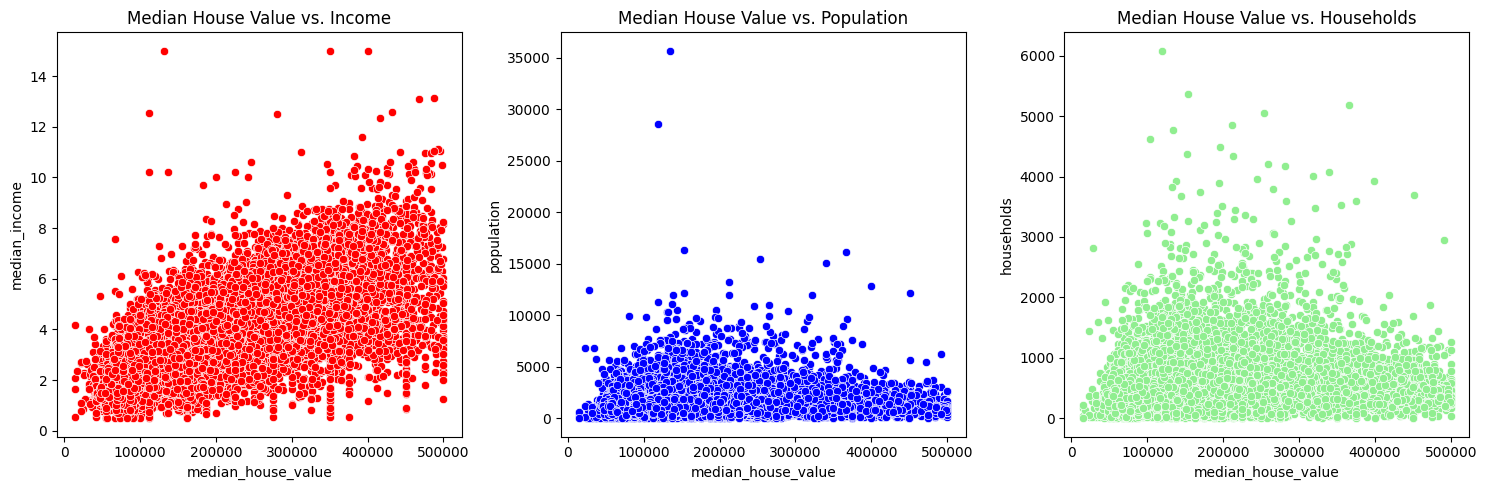

In [40]:
# Set plot size
plt.figure(figsize=(15, 5))

# Plot 1: Median House Value vs. Median Income
#plt.subplot(1, 3, 1)
#sns.scatterplot(x='median_income', y='median_house_value', data=housing_preprocessed,color='red')
#plt.title('Median House Value vs. Median Income')

plt.subplot(1, 3, 1)#
sns.scatterplot(x='median_house_value', y='median_income', data=housing_data,color='red')
plt.title('Median House Value vs. Income')

# Plot 2: Median House Value vs. Population
plt.subplot(1, 3, 2)
sns.scatterplot(x='median_house_value', y='population', data=housing_data,color='blue')
plt.title('Median House Value vs. Population')

# Plot 3: Median House Value vs. Number of Households
plt.subplot(1, 3, 3)
sns.scatterplot(x='median_house_value', y='households', data=housing_data,color='lightgreen')
plt.title('Median House Value vs. Households')

# Show the plots
plt.tight_layout()
plt.show()



##### Meadian Income :Represent the median income of households, by 10 of thousneds US dollar , where the range as per as shown is from 20K-150K, and it has positive corilation between income and house price 

##### Population : Indicates the total number of residents within a block,this variable can show the demeands levels on houses , where higher popluations resulted hight prices 

##### Number of Households:Represents the total number of households in a block,this variable is related to the size of the house where lower numbber of houses can increase the price and vice versa 

##### Median House Value:the median value of houses within a block, a key indicator of the housing market. that can be effected in alot of variabls 

#### One of the variables that that also can be used to predict the house price is the total rooms where adding more rooms can be reflected of the house price 

#### Prepate the model 

- Create Datasets
- Split the date to train and test 
- Apply the model 
- find MSE,MAE,Slop

In [41]:
income = housing_data['median_income']
population = housing_data['population']
households = housing_data['households']
house_value = housing_data['median_house_value']
print(population)
print(households)

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: population, Length: 19675, dtype: float64
0         126.0
1        1138.0
2         177.0
3         219.0
4         259.0
          ...  
20635     330.0
20636     114.0
20637     433.0
20638     349.0
20639     530.0
Name: households, Length: 19675, dtype: float64


- Splite the dat by using the train_test_split function from the sklearn.model_selection library
- Split income into training and testing data
- Split house_value into training and testing data
_ Split data by 70% and 30% respectively

In [54]:
#Income vs House Value 

from sklearn.model_selection import train_test_split

income_train, income_test, house_value_train, house_value_test = train_test_split(income,house_value, test_size = 0.3, random_state = 0)


In [55]:
income_train.shape

(13772,)

In [48]:
#Income vs House Value 

from sklearn.model_selection import train_test_split

income_train, income_test, house_value_train, house_value_test = train_test_split(housing_data[['median_income']],housing_data[['median_house_value']],test_size = 0.3, random_state = 0)


In [52]:
income_train.shape

(13772, 1)

In [10]:
#Population vs House Value

from sklearn.model_selection import train_test_split

population_train,population_test, house_value_train, house_value_test = train_test_split(population,house_value, test_size = 0.3, random_state = 0)


In [11]:
#Households vs House Value

from sklearn.model_selection import train_test_split

households_train, households_test, house_value_train, house_value_test = train_test_split(households,house_value, test_size = 0.3, random_state = 0)


In [12]:
#Reshape the data to be in the right format for the model

income_train=np.array(income_train).reshape(-1,1)
income_test=np.array(income_test).reshape(-1,1)

population_train=np.array(population_train).reshape(-1,1)
population_test=np.array(population_test).reshape(-1,1)

households_train=np.array(households_train).reshape(-1,1)
households_test=np.array(households_test).reshape(-1,1)

house_value_train=np.array(house_value_train).reshape(-1,1)
house_value_test=np.array(house_value_test).reshape(-1,1)

In [13]:
# Split Verifications
print(len(income_train))
print(len(income_test))

print(len(population_train))
print(len(population_test))

print(len(households_train))
print(len(households_test))

13772
5903
13772
5903
13772
5903


- Use sklearn's LinearRegression class to fit the data and predict the house value based on the median income, population, and number of households.


In [14]:
# Initialize the Linear Regression model
model = LinearRegression()


In [15]:
#median house value vs. median income   

model_income = model.fit(income_train,house_value_train)
house_value_pred_to_income_train = model_income.predict(income_train)
house_value_pred_to_income = model_income.predict(income_test)

In [16]:
intercept_income = model_income.intercept_
slope_income = model_income.coef_[0]

print(f"Intercept: {intercept_income}")
print(f"Slope: {slope_income}")

Intercept: [44395.7140667]
Slope: [40311.34438939]


In [17]:
#median house value vs. population
model_population = model.fit(population_train,house_value_train)
house_value_pred_to_population_train= model_population.predict(population_train)
house_value_pred_to_population = model_population.predict(population_test)

In [18]:
intercept_pop= model_population.intercept_
slope_pop = model_population.coef_[0]

print(f"Intercept: {intercept_income}")
print(f"Slope: {slope_income}")

Intercept: [44395.7140667]
Slope: [40311.34438939]


In [19]:
#median house value vs. number of households.
model_households = model.fit(households_train,house_value_train)
house_value_pred_to_households_train= model_households.predict(households_train)
house_value_pred_to_households= model_households.predict(households_test)


In [20]:
intercept_hh= model_households.intercept_
slope_hh = model_households.coef_[0]

print(f"Intercept: {intercept_income}")
print(f"Slope: {slope_income}")

Intercept: [44395.7140667]
Slope: [40311.34438939]


- Find MSE & MAE for All moldes

In [21]:
# For median house value vs. income train set
mse_income = mean_squared_error(house_value_train, house_value_pred_to_income_train)  
mae_income = mean_absolute_error(house_value_train, house_value_pred_to_income_train)
print("Median house value vs. income - Train set")
print(f"Mean squared error:{mse_income}")
print(f"Mean absolute error: {mae_income}")

Median house value vs. income - Train set
Mean squared error:5554134738.26339
Mean absolute error: 56796.07995844338


In [22]:
# For median house value vs. income test set
mse_income = mean_squared_error(house_value_test, house_value_pred_to_income)
mae_income = mean_absolute_error(house_value_test, house_value_pred_to_income)

print("Median house value vs. income - Test set")
print(f"Mean squared error:{mse_income}")
print(f"Mean absolute error: {mae_income}")


Median house value vs. income - Test set
Mean squared error:5723296991.822416
Mean absolute error: 56922.467178660874


In [23]:
# For median house value vs. population train set
mse_population = mean_squared_error(house_value_train, house_value_pred_to_population_train)
mae_population = mean_absolute_error(house_value_train, house_value_pred_to_population_train)

print("Median house value vs. population - Train set")
print(f"Mean squared error:{mse_population}")
print(f"Mean absolute error: {mae_population}")

Median house value vs. population - Train set
Mean squared error:9518685837.811312
Mean absolute error: 78194.638882989


In [24]:
#Median house value vs. population - Test set
mse_population = mean_squared_error(house_value_test, house_value_pred_to_population)
mae_population = mean_absolute_error(house_value_test, house_value_pred_to_population)

print("Median house value vs. population - Test set")
print(f"Mean squared error:{mse_population}")
print(f"Mean absolute error: {mae_population}")

Median house value vs. population - Test set
Mean squared error:9609443109.338057
Mean absolute error: 78611.90169237212


In [25]:
# For median house value vs. number of households train set 
mse_households = mean_squared_error(house_value_train , house_value_pred_to_households_train)
mae_households = mean_absolute_error(house_value_train , house_value_pred_to_households_train)

print("Median house value vs. population - Train set")
print(f"Mean squared error:{mse_households}")
print(f"Mean absolute error: {mae_households}")

Median house value vs. population - Train set
Mean squared error:9434205026.845612
Mean absolute error: 77675.63841968703


In [26]:
# Median house value vs. number of households - Test set
mse_households = mean_squared_error(house_value_test, house_value_pred_to_population)
mae_households = mean_absolute_error(house_value_test , house_value_pred_to_population)

print("Median house value vs. number of households - Test set")
print(f"Mean squared error:{mse_population}")
print(f"Mean absolute error: {mae_population}")

Median house value vs. number of households - Test set
Mean squared error:9609443109.338057
Mean absolute error: 78611.90169237212


In [27]:
intercept_income = model_income.intercept_
slope_income = model_income.coef_[0]

print(f"Intercept: {intercept_income}")
print(f"Slope: {slope_income}")

Intercept: [180283.528634]
Slope: [24.54713419]


- Find intercept and slope 

In [28]:
# Calculate slopes and intercepts
intercept_income = model_income.intercept_
slope_income = model_income.coef_[0]

intercept_population = model_population.intercept_
slope_population = model_population.coef_[0]


intercept_households = model_households.intercept_
slope_households = model_households.coef_[0]


- Inorder to present the resultes as one table , all findings have been transformed into a dataframe called resultes

In [29]:
# Create a DataFrame to present data as one table for comparison
results = pd.DataFrame({
    'Model': [
        'Median House Value vs. Households',
        'Median House Value vs. Population',
        'Median House Value vs. Income'
    ],
    'Intercept': [
        intercept_households,
        intercept_population,
        intercept_income
    ],
    'Slope': [
        slope_households,
        slope_population,
        slope_income
    ],
    'Mean Squared Error': [
        mse_households,
        mse_population,
        mse_income
    ],
    'Mean Absolute Error': [
        mae_households,
        mae_population,
        mae_income
    ]
})

# Display the results
results

,Model,Intercept,Slope,Mean Squared Error,Mean Absolute Error
0,Median House Value vs. Households,[180283.52863400482],[24.547134188087124],9.609443e+09,78611.901692
1,Median House Value vs. Population,[180283.52863400482],[24.547134188087124],9.609443e+09,78611.901692
2,Median House Value vs. Income,[180283.52863400482],[24.547134188087124],5.723297e+09,56922.467179


- Plot of predection model  for Median House Value vs. Income

TypeError: unsupported format string passed to numpy.ndarray.__format__

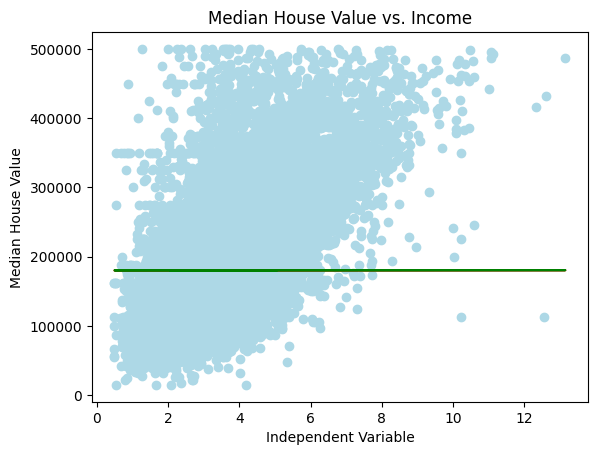

In [30]:

plt.scatter(income_train, house_value_train, color='lightblue', label='Data points')
plt.plot(income_train, slope_income * income_train + intercept_income, color='red', label='Regression line')
plt.plot(income_train,model_income.predict(income_train),color='green',label='Predicted line')
plt.title('Median House Value vs. Income')
plt.xlabel('Independent Variable')
plt.ylabel('Median House Value')
    
# Adding text box with parameters
textstr = '\n'.join((
    f'Intercept: {intercept_income:.1f}',
    f'Slope: {slope_income:.1f}',
    f'MSE: {mse_income:.1f}',
    f'MAE: {mae_income:.1f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
   fontsize=14, verticalalignment='top', bbox=props)
    
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()



- Plot of predection model  for Median House Value vs. Population',

In [ ]:

plt.scatter(population_train, house_value_train, color='blue', label='Data points')
plt.plot(population_train, slope_population * population_train + intercept_population, color='red', label='Regression line')
plt.plot(population_train,model_population.predict(population_train),color='green',label='Predicted line')
plt.title('Median House Value vs. Population')
plt.xlabel('Independent Variable')
plt.ylabel('Median House Value')
    
# Adding text box with parameters
textstr = '\n'.join((
    f'Intercept: {intercept_population:.1f}',
    f'Slope: {slope_population:.1f}',
    f'MSE: {mse_population:.1f}',
    f'MAE: {mae_population:.1f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
   fontsize=14, verticalalignment='top', bbox=props)

plt.tight_layout()    
plt.legend()
plt.grid()
plt.show()


In [ ]:
plt.subplot(1, 1, 1)
plt.scatter(households_train, house_value_train, color='lightgreen', label='Data points')
plt.plot(households_train, slope_households * households_train + intercept_households, color='red', label='Regression line')
plt.plot(households_train,model_households.predict(households_train),color='green',label='Predicted line')
plt.title('Median House Value vs. Households')
plt.xlabel('Independent Variable')
plt.ylabel('Median House Value')
    
# Adding text box with parameters
textstr = '\n'.join((
    f'Intercept: {intercept_households:.1f}',
    f'Slope: {slope_households:.1f}',
    f'MSE: {mse_households:.1f}',
    f'MAE: {mae_households:.1f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
   fontsize=14, verticalalignment='top', bbox=props)

plt.tight_layout()    
plt.legend()
plt.grid()
plt.show()

In [ ]:
income = housing_data['median_income']
population = housing_data['population']
households = housing_data['households']
house_value = housing_data['median_house_value']

In [33]:
model.fit((["income_train","Population_train","households_train"]),"median_house_value_train")

ValueError: Expected 2D array, got 1D array instead:
array=['income_train' 'Population_train' 'households_train'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Income based model showed the best fit with lowest MSE and MAE for both training and testing set , while population and houshold have shown higher MSE and MAE number, that indicate that using population and houshould are not providing accurate estimate.where the result imply that both population and houshold may not strongly coorelate with houes value independently